In [1]:
import numpy as np

from math import sqrt

from pprint import pprint

from sklearn import preprocessing
from sklearn.model_selection import KFold, cross_validate, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

import pandas as pd
import numpy as np

import pickle  #utilidad para grabar modelos

import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv')

df.dropna(inplace=True)

X = df['ENGINESIZE'].values.reshape(-1,1)
y = df['CO2EMISSIONS'].values

In [7]:
df.isnull().sum()

,0
MODELYEAR,0
MAKE,0
MODEL,0
VEHICLECLASS,0
ENGINESIZE,0
CYLINDERS,0
TRANSMISSION,0
FUELTYPE,0
FUELCONSUMPTION_CITY,0
FUELCONSUMPTION_HWY,0


In [8]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


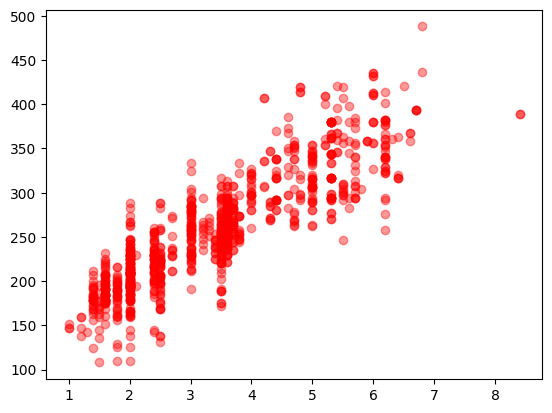

In [3]:
#plt.scatter(X_test, y_test,  color='black',label=r'datos test')
plt.scatter(X, y,  color='red',alpha=0.4,label=r'datos entrenamiento')

In [4]:
# Dividir 0.2 test y fijar semilla aleatoria
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
print(f'Max X_train {X_train.max()}, Min X_train {X_train.min()}')

Max X_train 8.4, Min X_train 1.0


In [ ]:
# Hacer analisis de outliers antes del escalado?

In [9]:
# Estandarización de los datos de entrenamiento y test
std_scaling = preprocessing.StandardScaler()

X_train = std_scaling.fit_transform(X_train)
X_test = std_scaling.transform(X_test)

In [10]:
print(f'Max X_train {X_train.max()}, Min X_train {X_train.min()}')

Max X_train 3.565562698402933, Min X_train -1.6682740684588393


In [13]:
print(np.std(X_train))
print(np.mean(X_train))

1.0
1.2703138007434382e-16


In [14]:
# Métricas de evaluación.
metricas = {
  'MAE': 'neg_mean_absolute_error',
  'MSE': 'neg_mean_squared_error',
  'R2' : 'r2',
  'RMSE': make_scorer(lambda y, y_pred:
                      sqrt(mean_squared_error(y, y_pred)),
                      greater_is_better=False),
  'MAPE': make_scorer(lambda y, y_pred:
                      np.mean(np.abs((y - y_pred) / y)) * 100,
                      greater_is_better=False)}

In [15]:
# Regresión lineal
# Definimos un algoritmo LR de regresión
algorithm = LinearRegression(fit_intercept=True)

In [16]:
# Validación y evaluación del modelo.
# en "cv = KFold(n_splits=5)" se hace un cross-validation INTERNO!!
results = cross_validate(algorithm, X_train, y_train, cv = KFold(n_splits=5, shuffle=True, random_state=42), scoring=metricas)
# Presentación de los resultados de la evaluación.
pprint(results)

{'fit_time': array([0.01614141, 0.00210547, 0.00082111, 0.00083256, 0.00075603]),
 'score_time': array([0.00336599, 0.00236917, 0.00221324, 0.00219178, 0.00297999]),
 'test_MAE': array([-21.94876355, -24.07325637, -24.00223808, -24.2710429 ,
       -22.05830724]),
 'test_MAPE': array([-8.75467615, -9.45453047, -9.35492369, -9.87187494, -9.05335148]),
 'test_MSE': array([ -872.60382485, -1041.39082822,  -894.60155776, -1050.49239628,
        -854.37718339]),
 'test_R2': array([0.72508571, 0.74330385, 0.78385585, 0.76907905, 0.77848554]),
 'test_RMSE': array([-29.5398684 , -32.27058766, -29.90989063, -32.41130044,
       -29.22973115])}


Es interesant comprobar si los datos resultantes de test_xxxx tiene poca variación entre las iteraciones

In [20]:
results.keys()

dict_keys(['fit_time', 'score_time', 'test_MAE', 'test_MSE', 'test_R2', 'test_RMSE', 'test_MAPE'])

In [17]:
# Definimos un algoritmo SVM de regresión candidato (SVM: Support Vector Machine)
model = LinearRegression(fit_intercept=True)
model = model.fit(X_train, y_train)

In [18]:
# MAE en el conjunto de test
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f'Test results (MAE) {mae}')

Test results (MAE) 24.09725741170784


In [21]:
# Metricas:
print('R2_test: ', model.score(X_test,y_test))
print('R2_train', model.score(X_train,y_train))


R2_test:  0.7615595731934373
R2_train 0.7644042001810549


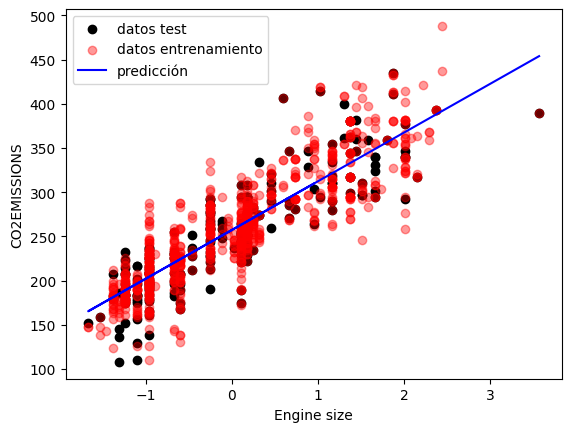

In [22]:
plt.scatter(X_test, y_test,  color='black',label=r'datos test')
plt.scatter(X_train, y_train,  color='red',alpha=0.4,label=r'datos entrenamiento')
plt.plot(X_test, y_pred, color='blue',label=r'predicción')
plt.legend(loc='best')
plt.xlabel(r'Engine size')
plt.ylabel(r'CO2EMISSIONS')
plt.show()

In [23]:
# Guardar modelo
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [24]:
ls

finalized_model.sav  sample_data/


In [25]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)  #score es un metodo del modelo,. o sea, del scikit
print(result)

0.7615595731934373


In [27]:
#KNN
# Definimos un algoritmo SVM de regresión
algorithm = KNeighborsRegressor(n_neighbors=10, weights='distance')

In [28]:
# Validación y evaluación del modelo.
# en "cv = KFold(n_splits=5)" se hace un cross-validation INTERNO!!
results = cross_validate(algorithm, X_train, y_train, cv = KFold(n_splits=5, shuffle=True, random_state=42), scoring=metricas)
# Presentación de los resultados de la evaluación.
pprint(results)

{'fit_time': array([0.0024426 , 0.00075865, 0.00080156, 0.00069165, 0.00071549]),
 'score_time': array([0.00458217, 0.00299621, 0.0029254 , 0.00278759, 0.00330234]),
 'test_MAE': array([-21.77749805, -22.76369628, -22.44787213, -22.09975957,
       -21.95211951]),
 'test_MAPE': array([-8.81053034, -9.03275703, -8.6862022 , -9.17912846, -8.86922371]),
 'test_MSE': array([-820.05660445, -911.56454891, -796.66587579, -923.59377068,
       -828.45382693]),
 'test_R2': array([0.74164074, 0.77530519, 0.80751803, 0.79697411, 0.78520669]),
 'test_RMSE': array([-28.63663047, -30.19212727, -28.22527016, -30.39068559,
       -28.78287385])}


In [29]:
# K-Vecinos
knn = KNeighborsRegressor(n_neighbors=2, weights='distance')
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2, weights='distance')

In [30]:
# MAE en el conjunto de test
y_pred = knn.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f'Test results (MAE) {mae}')

Test results (MAE) 25.492990654205606


In [31]:
# GridSearch
# Parameters
parameters = {'n_neighbors':np.arange(1,15), 'weights':('uniform', 'distance'), 'metric':('euclidean', 'cosine', 'manhattan')}
reg = KNeighborsRegressor()

model = GridSearchCV(reg, parameters, scoring='r2')

model.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'metric': ('euclidean', 'cosine', 'manhattan'),
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'weights': ('uniform', 'distance')},
             scoring='r2')

In [ ]:
print("Mejor conjunto de parámetros:")
print()
print(model.best_params_)
print()
print("Media y desviación:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

In [32]:
# Regresion Lineal Múltiple

archivo = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(archivo)

X = df[['engine-size','curb-weight']]
y = df['price']

In [35]:
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [33]:
# Dividir 0.2 test y fijar semilla aleatoria
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Estandarización de los datos de entrenamiento y test
std_scaling = preprocessing.StandardScaler()

X_train = std_scaling.fit_transform(X_train)
X_test = std_scaling.transform(X_test)

In [36]:
# Definimos un algoritmo SVM de regresión candidato
model = LinearRegression(fit_intercept=True)
model = model.fit(X_train, y_train)

In [37]:
# MAE en el conjunto de test
y_pred = model.predict(X_test)
r2_metric = r2_score(y_test, y_pred)

print(f'Test results (MAE) {r2_metric}')

Test results (MAE) 0.7464407346610846



#### Regresión Ridge
<p><a name="ridge"></a></p>

En éste típo de algorítmo se impondrá una penalidad sobre los coeficientes calculados, de tal manera que se modificará el error de los mínimos cuadrados como:

$$\sum (Y_i-\hat Y_i)^2+\alpha \sum w_i^2 $$


El hiperparámetro $\alpha$, llamado complejidad, controla qué tanto se penaliza los coeficientes, haciendo que éstos sean más pequeños y por tanto estabilizando las soluciones aunque a costa de una menor sesibilidad a los datos.



Para comparar entrenemos un modelo LinearRegresor y uno Ridge con todos los datos

In [38]:
df.dropna(inplace=True)
X = df[['symboling', 'normalized-losses', 'wheel-base', 'length',
       'width', 'height', 'curb-weight',
       'engine-size', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
       'city-L/100km',  'diesel', 'gas']]
y = df['price']

In [42]:
len(X.columns)

18

In [39]:
X

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,13.055556,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,109.1,0.907256,0.956944,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,10.217391,0,1
197,-1,95,109.1,0.907256,0.955556,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,12.368421,0,1
198,-1,95,109.1,0.907256,0.956944,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,13.055556,0,1
199,-1,95,109.1,0.907256,0.956944,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,9.038462,1,0


In [40]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

# Estandarización de los datos de entrenamiento y test
std_scaling = preprocessing.StandardScaler()

X_train = std_scaling.fit_transform(X_train)
X_test = std_scaling.transform(X_test)

#modelo OLS
linearM  = LinearRegression()
linearM.fit(X_train,y_train)
print('R2 OLS =',linearM.score(X_test,y_test))
print('wi OLS =',linearM.coef_)
print('w0 OLS =',linearM.intercept_)

#Modelo Ridge
print(5*'#')
ridge  = Ridge(alpha=1)
ridge.fit(X_train,y_train)
print('R2 Ridge =',ridge.score(X_test,y_test))
print('wi Ridge =',ridge.coef_)
print('w0 Ridge =',ridge.intercept_)

R2 OLS = 0.8435359669008105
wi OLS = [   41.33350054  -332.75723542   910.44520029 -1387.35958572
  1302.7417997    422.20013004   -80.1089445   4466.60323132
   -27.63545713  -932.83251864  2817.67505974   863.09068273
   841.52642664   149.75147435  1516.1495886   3774.39972443
  -558.29386234   558.29386234]
w0 OLS = 13289.070512820514
#####
R2 Ridge = 0.8440522038628457
wi Ridge = [   77.67559916  -336.95544497   820.2085158  -1202.64400945
  1287.84550045   427.9101263     41.66209988  4499.72010002
   -66.34843395  -987.31201423  1812.08844596  1008.60988735
   876.73274298   164.06760185  1336.08057866  3197.71295198
  -102.11008044   102.11008044]
w0 Ridge = 13289.070512820514


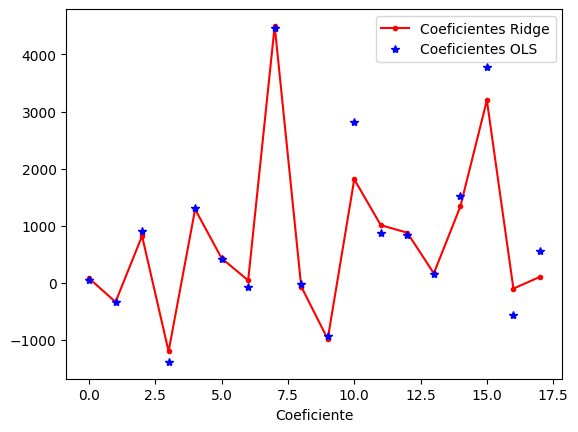

In [41]:
plt.figure()
plt.plot(ridge.coef_,'r.-',label=r'Coeficientes Ridge')
plt.plot(linearM.coef_,'b*',label=r'Coeficientes OLS')
plt.legend()
plt.xlabel(r'Coeficiente')
plt.show()

Vemos que en el caso del dataset para autos con un valor de $\alpha = 1$ se nota una pequeña variación en los parámetros y la precisión del modelo.

El modelo se hace robusto a variaciones de los predictores, pero puerde un poco de precisión (se necesitan más datos para entrenamiento)

En general el hiperparámetro $\alpha$ debe ser  buscado con varios experimentos.

#### Regresión Lasso
<p><a name="lasso"></a></p>

Al igual que el algorítmo Ridge, Lasso impone una penalidad sobre la función de error del OLS, pero ésta en cambio está dada por el valor absoluto de los coeficientes, así:
$$\sum (Y_i-\hat Y_i)^2+\alpha \sum |w_i|$$

Esto hace que a diferencia de Ridge que buscaba hacer pequeños los valores de algunos $w_i$, Lasso fuerza a que sean 0.

Así, puede decirse que Ridge es bueno cuando esperamos que todos los predictores tengan una influencia sobre el predictor así sea pequeña, mientras que Lasso se usará cuando esperamos que el numero de predictores relevantes sea pequeño (predictores con peso diferente de 0).

Para implementar una regresión tipo Lasso se sigue el mismo esquema de los casos anteriores.

In [43]:
from sklearn.linear_model import Lasso

#modelo Lasso
lasso  = Lasso(alpha=100)
lasso.fit(X_train,y_train)
print('R2 Lasso =',lasso.score(X_test,y_test))
print('wi Lasso =',lasso.coef_)
print('w0 Lasso =',lasso.intercept_)

R2 Lasso = 0.8378822258648377
wi Lasso = [  -0.         -149.57788734    0.           -0.         1034.95229149
  289.06600611    0.         4827.89849678   -0.         -850.50618362
 1323.1882597   709.06920992  779.54502143    0.           87.62734964
 1431.41415389    0.           -0.        ]
w0 Lasso = 13289.070512820514


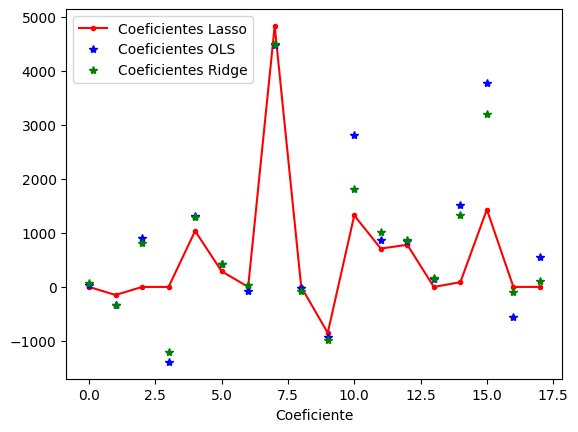

In [44]:
plt.figure()
plt.plot(lasso.coef_,'r.-',label=r'Coeficientes Lasso')
plt.plot(linearM.coef_,'b*',label=r'Coeficientes OLS')
plt.plot(ridge.coef_,'g*',label=r'Coeficientes Ridge')
plt.legend()
plt.xlabel(r'Coeficiente')
plt.show()

In [45]:
print('numero de coeficientes:',len(linearM.coef_))
print('numero de coeficientes diferentes a cero para Ridge:',len(ridge.coef_[ridge.coef_!=0]))
print('numero de coeficientes diferentes a cero para Lasso:',len(lasso.coef_[lasso.coef_!=0]))

numero de coeficientes: 18
numero de coeficientes diferentes a cero para Ridge: 18
numero de coeficientes diferentes a cero para Lasso: 10


#### Redes elásticas

Como vimos anteriormente, podemos generar penalizaciones a las regresiones lineales haciendo cambios en su metrica de error.

Para la regresión Ridge se penaliza con: $\alpha \sum w_i^2$ (penalidad $L_2$), mientras que para Lasso se tiene que:
$\alpha \sum |w_i|$ (penalidad $L_1$). Cada una de ellas tenía sus pro y sus contra. Pero es posible hacer una combinación de ambos metodos.

A las regresiones que usan una combinación de ambas penalidades se les conoce como **ElasticNet** (Redes elásticas) y definimos su error como:
$$\sum (Y_i- \hat Y_i)^2+\alpha \rho \sum |w_i| + \frac{\alpha(1-\rho)}{2}\sum w_i^2. $$

Note que cuando $ \rho=1$ tenemos la regresión Lasso, y con $\rho=0$ tendremos la de Ridge, por tanto en las redes elásticas $0\leq \rho\leq1$.

Hemos dado un paso más en la complejización del modelo ya que ahora debemos preocuparnos por el ajuste de 2 hiperparámetros para seleccionar el mejor modelo.

Para usar las redes elásticas en sklearn debemos importar la función 'ElasticNet' del modulo de modelos lineales.

In [ ]:
from sklearn.linear_model import ElasticNet

En la implementación de sklearn tenemos los hiperparámetros 'alpha' y 'l1_ratio' ($\rho$ en nuestra ecuación), con ellos controlaremos el comportamiento del regresor.

Tenga en cuenta que para valores de *l1_ratio* $\leq0.01$ el algoritmo de sklearn no es estable si usamos el valor de $\alpha$ por defecto y se hace necesario que nosotros mísmos ajustemos el valor.

In [ ]:
df=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv')

df.dropna(inplace=True)

X = df['ENGINESIZE'].values.reshape(-1,1)
y = df['CO2EMISSIONS'].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn import metrics

#seleccionamos los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

# Estandarización de los datos de entrenamiento y test
std_scaling = preprocessing.StandardScaler()

X_train = std_scaling.fit_transform(X_train)
X_test = std_scaling.transform(X_test)


#entrenamos el modelo
elastic = ElasticNet(alpha=0.01,l1_ratio=1)
elastic.fit(X_train,y_train)
y_pred = elastic.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test,  color='black',label=r'datos test')
plt.scatter(X_train, y_train,  color='red',alpha=0.4,label=r'datos entrenamiento')
plt.plot(X_test, y_pred, color='blue',label=r'predicción')
plt.legend(loc='best')
plt.xlabel(r'Engine size')
plt.ylabel(r'Price')
plt.show()

In [ ]:
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2: ', elastic.score(X_test,y_test))

De nuevo, los hiperparámetros debemos seleccionarlos con una busqueda para determinar una buena combinación.

In [ ]:
parameters = {'OLS':{},
              'Lasso':{'alpha':(0.1,0.5,1,5,10,50,100)},
              'Ridge':{'alpha':(0.1,0.5,1,5,10,50,100)},
              'KNN':{'n_neighbors':np.arange(1,15),
                     'weights':('uniform','distance'),
                     'metric':('euclidean','manhattan','cosine')
                     }
              }

In [ ]:
algs = {'OLS':LinearRegression(),
        'Lasso':Lasso(random_state=42),
        'Ridge':Ridge(random_state=42),
        'KNN':KNeighborsRegressor()
        }

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

# Estandarización de los datos de entrenamiento y test
std_scaling = preprocessing.StandardScaler()

X_train = std_scaling.fit_transform(X_train)
X_test = std_scaling.transform(X_test)

In [ ]:
model = {}

for name, _ in algs.items():
  print(colored('Algorithm '+name,'blue'))
  score = make_scorer(r2_score)
  model_cv = GridSearchCV(algs[name], parameters[name], scoring=score, cv=KFold(n_splits=5, shuffle=True, random_state=42), return_train_score=True)

  model[name] = model_cv.fit(X_train, y_train)

  cv_res = model[name].cv_results_
  print("Best parameters:", model[name].best_params_)

  best_iter = model[name].best_index_

  print('R2 score: %0.4f +/- %0.4f'%(cv_res['mean_test_score'][best_iter],
                                     cv_res['std_test_score'][best_iter]))